In [6]:
import numpy as np
import pandas as pd
import geoviews as gv
import geoviews.feature as gf
from geoviews import opts, tile_sources as gvts
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
%matplotlib inline

gv.extension('matplotlib')

gv.output(fig='png', size=300)

from rasterstats import zonal_stats, point_query
import geopandas as gpd

from dask.distributed import Client

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import fiona
import datetime


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [5]:
gdfx = gpd.read_file('../data_archive/ISEA7H_5.gpkg', driver='GPKG', layer='ISEA7H_5_crosstouch')

In [7]:
base_path = 'D:/data/ECMWF_CCI_Landuse'

# twi_5m_estonia.tif tri_5m_estonia.tif tri_5m_estonia.tif ls_faktor_5m_estonia.tif
rastergrids = {
    'lulc2006': 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2006-v2.0.7cds_mode.tif',
    'lulc2008': 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2008-v2.0.7cds_mode.tif',
    'lulc2010': 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7cds_mode.tif',
    'lulc2012': 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2012-v2.0.7cds_mode.tif',
    'lulc2014': 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2014-v2.0.7cds_mode.tif',
    'lulc2016': 'C3S-LC-L4-LCCS-Map-300m-P1Y-2016-v2.1.1_mode.tif',
    'lulc2018': 'C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1_mode.tif'
}

raster_file_collection = []

template_raster_conf = {
    'variable_name': 'lulc2006',
    'actual_file_ref': 'D:/data/ECMWF_CCI_Landuse/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2006-v2.0.7cds_mode.tif'
}


for layer_type in rastergrids.keys():
    file_name = f"{rastergrids[layer_type]}"
    try:
        with open(f"{base_path}/{file_name}", 'r') as fh:
            # Load configuration file values
            print(file_name)
            template_raster_conf = {
                'variable_name': layer_type,
                'actual_file_ref': f"{base_path}/{file_name}"
            }
            raster_file_collection.append(template_raster_conf)
    except FileNotFoundError:
        # Keep preset values
        print("NOT " + f"{rastergrids[layer_type]}")

ESACCI-LC-L4-LCCS-Map-300m-P1Y-2006-v2.0.7cds_mode.tif
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2008-v2.0.7cds_mode.tif
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7cds_mode.tif
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2012-v2.0.7cds_mode.tif
ESACCI-LC-L4-LCCS-Map-300m-P1Y-2014-v2.0.7cds_mode.tif
C3S-LC-L4-LCCS-Map-300m-P1Y-2016-v2.1.1_mode.tif
C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1_mode.tif


In [8]:
raster_file_collection

[{'variable_name': 'lulc2006',
  'actual_file_ref': 'D:/data/ECMWF_CCI_Landuse/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2006-v2.0.7cds_mode.tif'},
 {'variable_name': 'lulc2008',
  'actual_file_ref': 'D:/data/ECMWF_CCI_Landuse/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2008-v2.0.7cds_mode.tif'},
 {'variable_name': 'lulc2010',
  'actual_file_ref': 'D:/data/ECMWF_CCI_Landuse/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7cds_mode.tif'},
 {'variable_name': 'lulc2012',
  'actual_file_ref': 'D:/data/ECMWF_CCI_Landuse/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2012-v2.0.7cds_mode.tif'},
 {'variable_name': 'lulc2014',
  'actual_file_ref': 'D:/data/ECMWF_CCI_Landuse/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2014-v2.0.7cds_mode.tif'},
 {'variable_name': 'lulc2016',
  'actual_file_ref': 'D:/data/ECMWF_CCI_Landuse/C3S-LC-L4-LCCS-Map-300m-P1Y-2016-v2.1.1_mode.tif'},
 {'variable_name': 'lulc2018',
  'actual_file_ref': 'D:/data/ECMWF_CCI_Landuse/C3S-LC-L4-LCCS-Map-300m-P1Y-2018-v2.1.1_mode.tif'}]

In [14]:
def inner_raster_summary(raster_conf_dict, scattered_df):

    print("Starting with {} at {}".format(raster_conf_dict['actual_file_ref'], datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))

    variable_name = raster_conf_dict['variable_name']
    actual_file_ref = raster_conf_dict['actual_file_ref']

    tif_src = actual_file_ref

    parquet_tmp_out = f"{base_path}/{variable_name}_zonal_stats.parquet.gzip"

    print("zonal stats")
    outputs = zonal_stats(scattered_df['geometry'],
            tif_src,
            stats="majority",
            # geojson_out=True,
            all_touched=True)

    print("output df preps")
    geo_stats_df = pd.DataFrame(outputs)
    print(geo_stats_df.columns)

    var1_name = f"{variable_name}"

    geo_stats_df.rename(columns={'majority': var1_name}, inplace=True)

    print(geo_stats_df.columns)

    geom_df = pd.concat([scattered_df, geo_stats_df], axis=1)
    geom_df.drop(columns=['geometry'], inplace=True)
    geom_df = geom_df[['Name', var1_name]]
    geom_df.set_index('Name', inplace=True)

    print("writing {} at {}".format(parquet_tmp_out, datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))

    geom_df.to_parquet(parquet_tmp_out, compression='gzip', engine='pyarrow')

    del(geom_df)
    del(outputs)
    del(geo_stats_df)

    return f"{parquet_tmp_out} written"

In [13]:
geo_stats_df.head(3)

NameError: name 'geo_stats_df' is not defined

In [15]:
inner_raster_summary(raster_file_collection[0], gdfx)


Starting with D:/data/ECMWF_CCI_Landuse/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2006-v2.0.7cds_mode.tif at 2020-11-30 15:52:20
zonal stats


RasterioIOError: D:/data/ECMWF_CCI_Landuse/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2006-v2.0.7cds_mode.tif: No such file or directory

In [ ]:
client = Client(processes=True,
                n_workers=6,
                threads_per_worker=1,
                memory_limit='16GB')

print(client.scheduler_info()['services'])

refdf_scattered = client.scatter(geom_template_df, broadcast=True)

futures = [client.submit(inner_raster_summary, raster_conf_obj, refdf_scattered) for raster_conf_obj in raster_file_collection]
# futures = client.map(inner_raster_summary, raster_file_collection)(refdf_scattered)
results = client.gather(futures)
for i in results:
    print(i)


In [ ]:
layer1 = gpd.read_file(geom_template[0], layer=geom_template[1], driver='GPKG', encoding='utf-8')
layer1.set_index('Name', inplace=True)

for layer in rastergrids.keys():
    parquet_tmp_out = f"{base_path}/{variable_name}_zonal_stats.parquet.gzip"
    next_layer = pd.read_parquet(parquet_tmp_out)

    layer1 = layer1.join(next_layer, how='inner')

layer1.to_file(geom_template[0], layer=f"{geom_template[1]}_lulc", driver='GPKG', encoding='utf-8')

## pre-calc dataline cross and world countries touch (55 km square analogue, 3046.. km2 hexagons

In [2]:
globe_grid = gpd.read_file('../data_archive/ISEA7H_5.gpkg', layer='ISEA7H_5')

In [3]:
globe_countries = gpd.read_file('../data_archive/natural_earth_dis.gpkg', layer='natural_earth_dis')

In [ ]:
# cell_touches = globe_grid.intersects(globe_countries.loc[0, 'geometry'])

In [ ]:
globe_hex = globe_grid.loc[cell_touches].copy()

In [ ]:
len(globe_hex)

In [4]:
from typing import Union, List
from shapely.geometry import mapping, Polygon, GeometryCollection
from shapely import affinity

# https://towardsdatascience.com/around-the-world-in-80-lines-crossing-the-antimeridian-with-python-and-shapely-c87c9b6e1513
# https://gist.github.com/PawaritL/ec7136c0b718ca65db6df1c33fd1bb11

def check_crossing(lon1: float, lon2: float, validate: bool = True):
    """
    Assuming a minimum travel distance between two provided longitude coordinates,
    checks if the 180th meridian (antimeridian) is crossed.
    """
    if validate and any(abs(x) > 180.0 for x in [lon1, lon2]):
        raise ValueError("longitudes must be in degrees [-180.0, 180.0]")   
    return abs(lon2 - lon1) > 180.0

def check_for_geom(geom):
    crossed = False
    p_init = geom.exterior.coords[0]

    for p in range(1, len(geom.exterior.coords)):
        px = geom.exterior.coords[p]
        # print(px)

        if check_crossing(p_init[0], px[0]):
            crossed = True
        p_init = px
    
    return crossed

In [ ]:
globe_hex['crossed'] = globe_hex['geometry'].apply(check_for_geom)

In [5]:
import dask.dataframe as dd

from dask.distributed import Client

In [6]:
globe_grid['wkt'] = globe_grid['geometry'].apply(lambda x: x.wkt)

In [7]:
globe_grid.head()

Name                                           geometry  \
0    1  POLYGON ((10.85089 58.10455, 11.44547 58.02702...   
1    2  POLYGON ((-168.62282 58.54989, -169.19661 58.4...   
2    3  POLYGON ((-168.61889 59.78612, -169.27374 59.7...   
3    4  POLYGON ((-168.61454 61.02939, -169.29098 60.9...   
4    5  POLYGON ((-168.60970 62.27947, -169.31016 62.1...   

                                                 wkt  
0  POLYGON ((10.85089451437534 58.10455205951229,...  
1  POLYGON ((-168.6228171930694 58.54989034247958...  
2  POLYGON ((-168.6188919342209 59.78611995014992...  
3  POLYGON ((-168.6145381788029 61.02938822017963...  
4  POLYGON ((-168.6096967124061 62.27946907689, -...

In [8]:
ddf = dd.from_pandas(globe_grid[['Name', 'wkt']].copy(), npartitions=36)

In [33]:
len(globe_grid)

168072

In [9]:
globe_grid.head(1)

Name                                           geometry  \
0    1  POLYGON ((10.85089 58.10455, 11.44547 58.02702...   

                                                 wkt  
0  POLYGON ((10.85089451437534 58.10455205951229,...

In [10]:
globe_grid.dtypes

Name          object
geometry    geometry
wkt           object
dtype: object

In [11]:
pd.Series([ True, False ] )

0     True
1    False
dtype: bool

In [12]:
# globe_grid.intersects(globe_countries.loc[0, 'geometry'])

from typing import (Any, Callable, Dict, Generic, Iterable, List, Mapping,
                    NewType, Sequence, Tuple, TypeVar, Union)

from shapely import wkt

import copy

geom = copy.copy(globe_countries.loc[0, 'geometry'])

from shapely.geometry import shape, Polygon, MultiPolygon

# meta=gpd.GeoDataFrame({0: ['str'], 'geometry': [ geom ] })

def per_partition_lambda_intersect(partial_grid: pd.DataFrame, geom: Polygon):
    
    partial_grid['geometry'] = partial_grid['wkt'].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(partial_grid, geometry='geometry', crs=4326)
    gdf['touched'] = gdf.intersects(geom)
    print('done one')
    gdf['crossed'] = gdf['geometry'].apply(check_for_geom)
    print('done two')
    return pd.DataFrame(gdf[['Name', 'touched', 'crossed']]).copy()
    
result = ddf.map_partitions( per_partition_lambda_intersect, geom, meta=pd.DataFrame({ 'Name': ['1', '2'], 'touched' :[ True, False ], 'crossed' :[ True, False ] } ) )
    
# ddf = ddf.assign(touched=result)



In [13]:
rc = result.compute()

done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done one
done one
done two
done two
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done one
done two
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done two
done one
done one
done two
done two
done one
done two
done one
done two
done one
done two
done one
done two


In [14]:
type(rc)

pandas.core.frame.DataFrame

In [16]:
rc.to_parquet('result-pq.gzip', compression='gzip')

In [17]:
len(rc)

168072

In [18]:
rc.sample(5)

Name  touched  crossed
33034    33035     True    False
38725    38726    False    False
123829  123830     True    False
137443  137444     True    False
18180    18181     True    False

In [20]:
rc2 = pd.read_parquet('result-pq.gzip')

In [21]:
len(rc2)

168072

In [22]:
rc2.sample(5)

Name  touched  crossed
26921    26922    False    False
149204  149205    False    False
43843    43844     True    False
3806      3807    False    False
126218  126219    False    False

In [24]:
# ddf = ddf.assign(touched=result)
tdf = pd.concat([globe_grid, rc], axis=1)
tdf.sample(3)

Name                                           geometry  \
64942  64943  POLYGON ((92.57856 -6.01919, 92.26573 -6.11457...   
47688  47689  POLYGON ((13.42838 -37.56876, 13.01822 -37.462...   
19551  19552  POLYGON ((1.09557 49.88918, 0.87496 50.17041, ...   

                                                     wkt   Name  touched  \
64942  POLYGON ((92.57855894506021 -6.01918744809923,...  64943    False   
47688  POLYGON ((13.42837910305665 -37.56876302545, 1...  47689    False   
19551  POLYGON ((1.095571005980157 49.88917735100588,...  19552     True   

       crossed  
64942    False  
47688    False  
19551    False

In [29]:
tdf = tdf.iloc[:,  [0,1,2,4,5]][['Name','touched','crossed','geometry']]
tdf.sample(3)

Name  touched  crossed  \
45920  45921    False    False   
73271  73272     True    False   
59690  59691    False    False   

                                                geometry  
45920  POLYGON ((5.11823 -36.25399, 4.72516 -36.21513...  
73271  POLYGON ((121.96888 46.39654, 121.60151 46.260...  
59690  POLYGON ((73.23397 -9.28750, 72.94178 -9.39781...

In [30]:
gdfx = gpd.GeoDataFrame(tdf, geometry='geometry', crs='EPSG:4326')

In [31]:
len(gdfx)

168072

In [32]:
len(tdf)

168072

In [36]:
lon = gdfx.loc[73271, 'geometry'].centroid.x
lat = gdfx.loc[73271, 'geometry'].centroid.y
proj4_txt = f'+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

print(proj4_txt)

+proj=aeqd +lat_0=46.08226481401279 +lon_0=121.9900191575765 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs


In [41]:
gdfx.loc[gdfx['Name'] == '73271'].to_crs(proj4_txt)['geometry'].apply(lambda x: x.area / 1000000)

73270    3041.690603
Name: geometry, dtype: float64

In [42]:
import math
math.sqrt(3041.6)

55.150702624717304

In [43]:
gdfx.to_file('../data_archive/ISEA7H_5.gpkg', driver='GPKG', layer='ISEA7H_5_crosstouch')

## Antipode thing

In [12]:
eesti = gpd.read_file('../data_archive/estonia_without_lakes.shp')

In [14]:
eesti.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
geom = eesti.loc[0, 'geometry']

In [16]:
geom

In [18]:
dir(geom)

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',


In [22]:
len(geom.geoms)

119

<class 'shapely.coords.CoordinateSequence'>
8
<class 'shapely.coords.CoordinateSequence'>
50713
<class 'shapely.coords.CoordinateSequence'>
31
<class 'shapely.coords.CoordinateSequence'>
6
<class 'shapely.coords.CoordinateSequence'>
24
<class 'shapely.coords.CoordinateSequence'>
13
<class 'shapely.coords.CoordinateSequence'>
11
<class 'shapely.coords.CoordinateSequence'>
10
<class 'shapely.coords.CoordinateSequence'>
19
<class 'shapely.coords.CoordinateSequence'>
5
<class 'shapely.coords.CoordinateSequence'>
22
<class 'shapely.coords.CoordinateSequence'>
16
<class 'shapely.coords.CoordinateSequence'>
121
<class 'shapely.coords.CoordinateSequence'>
23
<class 'shapely.coords.CoordinateSequence'>
43
<class 'shapely.coords.CoordinateSequence'>
55
<class 'shapely.coords.CoordinateSequence'>
33
<class 'shapely.coords.CoordinateSequence'>
18
<class 'shapely.coords.CoordinateSequence'>
32
<class 'shapely.coords.CoordinateSequence'>
14
<class 'shapely.coords.CoordinateSequence'>
14
<class 'shap

<AxesSubplot:>

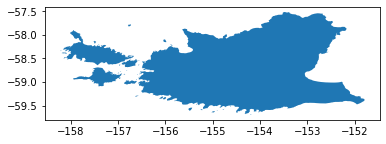

In [50]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

redone = []

for i in geom.geoms:
    ext = i.exterior
    print(type(ext.coords))
    print(len(ext.coords))
    linestring_n = []
    for p in ext.coords:
        n_x = -1* ( 180 - p[0])
        n_y = -p[1]
        linestring_n.append(Point((n_x, n_y)))
    new_ext = Polygon(linestring_n)
    redone.append(new_ext)

anti_eesti = MultiPolygon(redone)

new_geo = gpd.GeoDataFrame()

new_geo['geometry'] = None

new_geo.loc[0, 'geometry'] = anti_eesti

new_geo.plot()


In [51]:
new_geo.to_file('../data_archive/eesti_anti_default.shp')

In [ ]:
for i in geom.geoms:
    ext = i.exterior
    # print(type(ext.coords))
    # print(len(ext.coords))
    linestring_n = []
    for p in ext.coords:
        n_x = - p[0] -130  # -157 p[0]-180
        n_x_t1 = p[0]-180
        
minx = None
maxx = None

<AxesSubplot:>

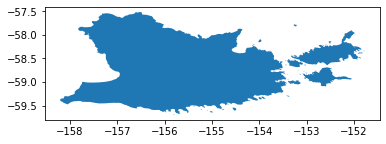

In [49]:
redone2 = []


for i in geom.geoms:
    ext = i.exterior
    # print(type(ext.coords))
    # print(len(ext.coords))
    linestring_n = []
    for p in ext.coords:
        n_x = - p[0] -130  # -157 p[0]-180
        n_x_t1 = p[0]-180
        
        n_y = -p[1]
        linestring_n.append(Point((n_x, n_y)))
    new_ext = Polygon(linestring_n)
    redone2.append(new_ext)

anti_eesti2 = MultiPolygon(redone2)

new_geo2 = gpd.GeoDataFrame()

new_geo2['geometry'] = None

new_geo2.loc[0, 'geometry'] = anti_eesti2

new_geo2.plot()

In [52]:
new_geo2.to_file('../data_archive/eesti_anti_fake_130.shp')